# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [7]:
# Your code here :

X = data.drop(columns='MEDV')
y = data['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)



## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
# Your code here :
from sklearn.linear_model import LinearRegression

medv_mod = LinearRegression()

medv_mod.fit(X_train,y_train)

y_train_pred = medv_mod.predict(X_train)
y_test_pred = medv_mod.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [ ]:
# Your code here :
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)


print("R² for training data:", r2_train)
print("R² for test data:", r2_test)



R² for training data: 0.7285831776605591
R² for test data: 0.7789207451814407


## 4. Calculate and print mean squared error for both the training and the testing set.

In [ ]:
# Your code here :

mse_train = mean_squared_error(y_train,y_train_pred)

mse_test = mean_squared_error(y_test,y_test_pred)

print("mean squared error for training data:", mse_train)
print("mean squared error for test data:", mse_test)

mean squared error for training data: 22.95369357611288
mean squared error for test data: 18.495420122448486


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [11]:
# Your code here :
mae_train = mean_absolute_error(y_train,y_train_pred)

mae_test = mean_absolute_error(y_test,y_test_pred)

print("mean absolute error for training data:", mae_train)
print("mean absolute error for test data:", mae_test)

mean absolute error for training data: 3.384457539916795
mean absolute error for test data: 3.113043746893436


## Classification Model Evaluation

In [12]:
from sklearn.datasets import load_iris
data = load_iris()

In [13]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [14]:
column_names = data.feature_names

In [15]:
df = pd.DataFrame(data['data'],columns=column_names)

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
target = pd.DataFrame(data.target)

In [18]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [20]:
# Your code here :

X_train, X_test, y_train, y_test = train_test_split(df,target,random_state=5,train_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [22]:
# Your code here :

from sklearn.linear_model import LogisticRegression

flowermodel = LogisticRegression()

flowermodel.fit(X_train,y_train)

y_train_pred = flowermodel.predict(X_train)

y_test_pred = flowermodel.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [31]:
# Your code here :
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score


print('Accuracy score training:', accuracy_score(y_train,y_train_pred))
print('Accuracy score test:', accuracy_score(y_test,y_test_pred))

Accuracy score training: 1.0
Accuracy score test: 0.9416666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [47]:
# Your code here :

print('Balanced accuracy score training:', balanced_accuracy_score(y_train,y_train_pred))
print('Balanced accuracy score test:', balanced_accuracy_score(y_test,y_test_pred))

Balanced accuracy score training: 1.0
Balanced accuracy score test: 0.9457364341085271


## 10. Calculate and print the precision score for both the training and the testing set.

In [48]:
# Your code here :

print('Precision score training:', precision_score(y_train,y_train_pred,average=None))
print('Precision score test:', precision_score(y_test,y_test_pred, average=None))

Precision score training: [1. 1. 1.]
Precision score test: [0.97560976 1.         0.86046512]


## 11. Calculate and print the recall score for both the training and the testing set.

In [49]:
# Your code here :

print('Recall score training:', recall_score(y_train,y_train_pred,average=None))
print('Recall score test:', recall_score(y_test,y_test_pred, average=None))

Recall score training: [1. 1. 1.]
Recall score test: [1.        0.8372093 1.       ]


## 12. Calculate and print the F1 score for both the training and the testing set.

In [50]:
# Your code here :

print('F1 score training:', f1_score(y_train,y_train_pred,average=None))
print('F1 score test:', f1_score(y_test,y_test_pred, average=None))

F1 score training: [1. 1. 1.]
F1 score test: [0.98765432 0.91139241 0.925     ]


## 13. Generate confusion matrices for both the training and the testing set.

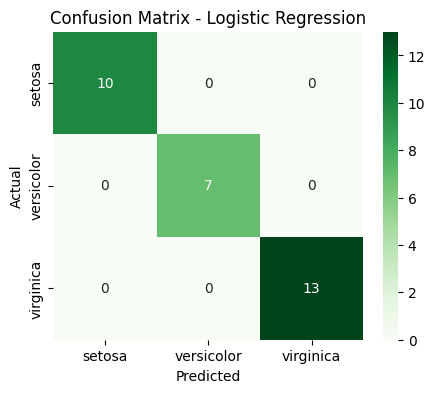

In [51]:
# Your code here :


cm_train = confusion_matrix(y_train, y_train_pred)
# Confusion Matrix (Heatmap)
plt.figure(figsize=(5,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

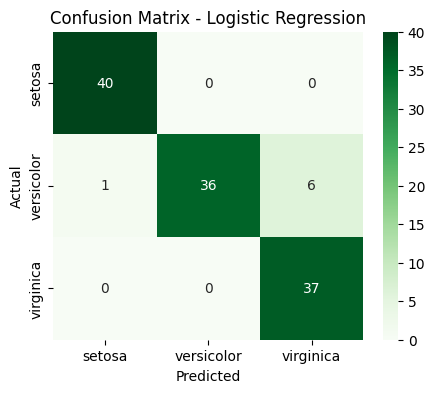

In [52]:
cm_test = confusion_matrix(y_test, y_test_pred)
# Confusion Matrix (Heatmap)
plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !